# Difference of Gaussians (edge detection)

inspired by: https://youtu.be/5EuYKEvugLU

## setup

In [9]:
import torch as t
from PIL import Image
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.transforms.functional import gaussian_blur
import matplotlib.pyplot as plt

In [35]:
def plot_img(img, title=None, ax=None, loc='left'):
    if ax is None: fig, ax = plt.subplots()
    else: fig = ax.get_figure()
    img = img.clip(0.0, 1.0)
    if img.shape[0] in (3, 1): img = img.permute(1, 2, 0)
    ax.axis('off')
    fig.tight_layout()
    if title is not None: ax.set_title(title, loc=loc)
    ax.imshow(img)

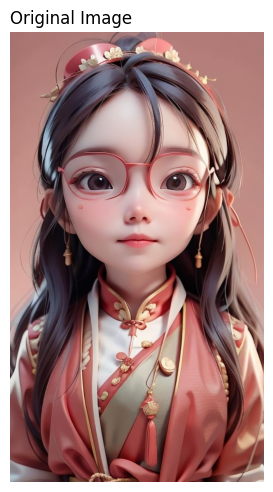

In [37]:
img = ToTensor()(Image.open('data/img.png'))
plot_img(img, 'Original Image')

## difference of gaussians

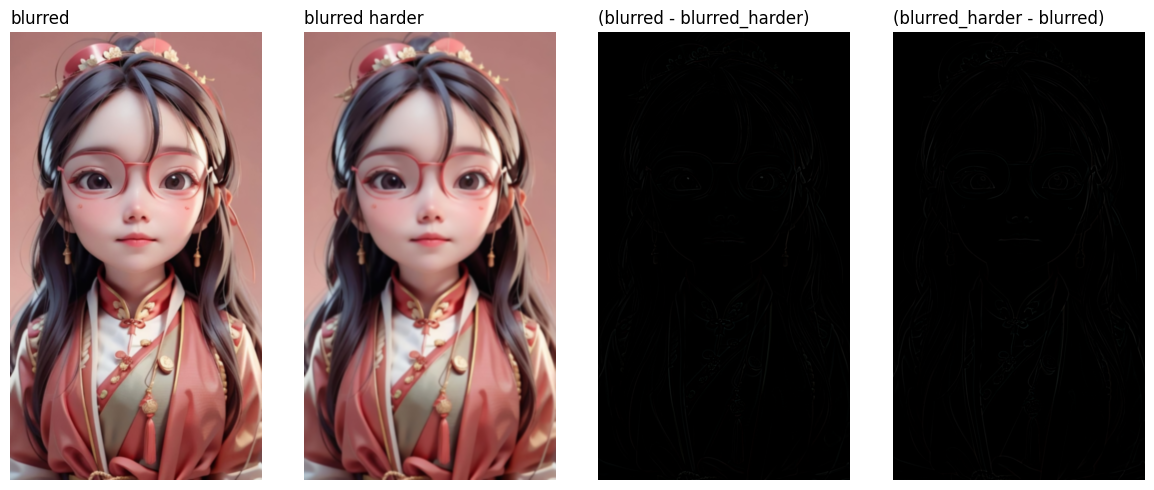

In [41]:
def difference_of_gaussians(img, kernel_size=101, sigma=2.0, k=1.5):
    blurred = gaussian_blur(img, kernel_size, sigma)
    blurred2 = gaussian_blur(img, kernel_size, sigma * k)
    return blurred, blurred2, blurred - blurred2, blurred2 - blurred

blurred, blurred_harder, diff, diff2 = difference_of_gaussians(img)
_, axs = plt.subplots(1, 4, figsize=(12, 5))
plot_img(blurred, 'blurred', ax=axs[0])
plot_img(blurred_harder, 'blurred harder', ax=axs[1])
plot_img(diff, '(blurred - blurred_harder)', ax=axs[2])
plot_img(diff2, '(blurred_harder - blurred)', ax=axs[3])

## with threshold

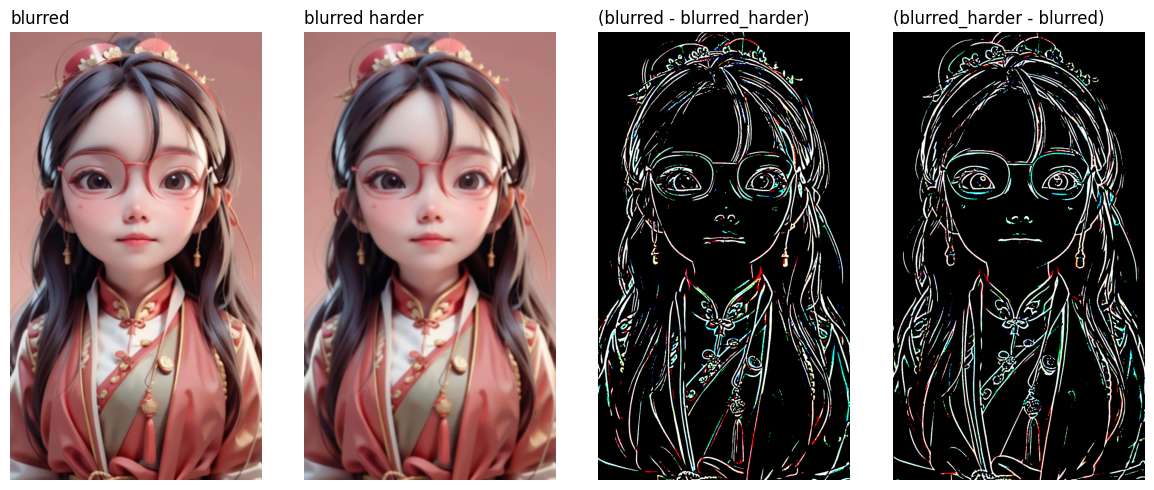

In [57]:
def difference_of_gaussians(img, kernel_size=101, sigma=2.0, k=1.5, threshold=0.01):
    blurred = gaussian_blur(img, kernel_size, sigma)
    blurred2 = gaussian_blur(img, kernel_size, sigma * k)
    diff = blurred - blurred2
    diff2 = blurred2 - blurred
    diff = (diff > threshold).float()
    diff2 = (diff2 > threshold).float()
    return blurred, blurred2, diff, diff2

blurred, blurred_harder, diff, diff2 = difference_of_gaussians(img)
_, axs = plt.subplots(1, 4, figsize=(12, 5))
plot_img(blurred, 'blurred', ax=axs[0])
plot_img(blurred_harder, 'blurred harder', ax=axs[1])
plot_img(diff, '(blurred - blurred_harder)', ax=axs[2])
plot_img(diff2, '(blurred_harder - blurred)', ax=axs[3])

## merging channels

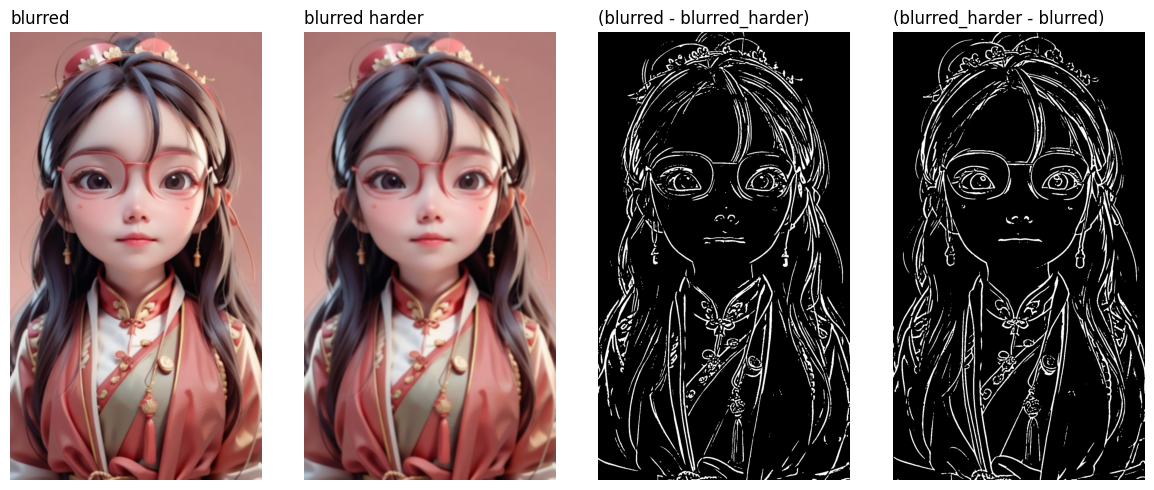

In [69]:
def difference_of_gaussians(img, kernel_size=101, sigma=2.0, k=1.5, threshold=0.01):
    blurred = gaussian_blur(img, kernel_size, sigma)
    blurred2 = gaussian_blur(img, kernel_size, sigma * k)
    diff = (blurred - blurred2).mean(dim=0).repeat(3, 1, 1)
    diff2 = (blurred2 - blurred).mean(dim=0).repeat(3, 1, 1)
    diff = (diff > threshold).float()
    diff2 = (diff2 > threshold).float()
    return blurred, blurred2, diff, diff2

blurred, blurred_harder, diff, diff2 = difference_of_gaussians(img)
_, axs = plt.subplots(1, 4, figsize=(12, 5))
plot_img(blurred, 'blurred', ax=axs[0])
plot_img(blurred_harder, 'blurred harder', ax=axs[1])
plot_img(diff, '(blurred - blurred_harder)', ax=axs[2])
plot_img(diff2, '(blurred_harder - blurred)', ax=axs[3])